In [1]:
%matplotlib inline

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [22]:
plt.style.use('ggplot')

In [54]:
iris_data = pd.read_csv('data/Iris.csv')
iris_data.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [24]:
#check for null values
iris_data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [40]:
# check column types 
iris_data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [43]:
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [26]:
iris_data.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

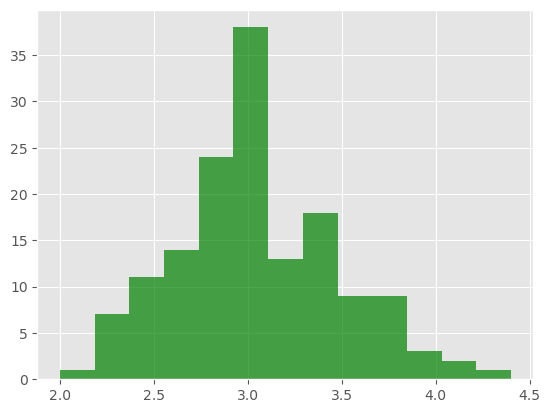

In [38]:
plt.hist(iris_data['SepalWidthCm'], label ='SepalWidth', color='green',bins='fd',alpha=0.7)
plt.show()

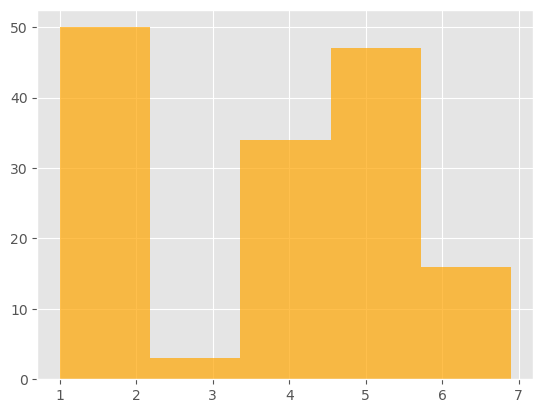

In [37]:
plt.hist(iris_data['PetalLengthCm'], label ="PetalLength", color="orange", bins='fd', alpha = 0.7)
plt.show()

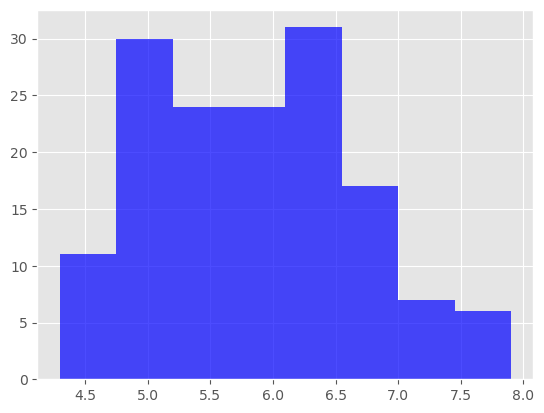

In [55]:
plt.hist(iris_data['SepalLengthCm'], label="SepalLength", color='blue', bins='fd', alpha = 0.7)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


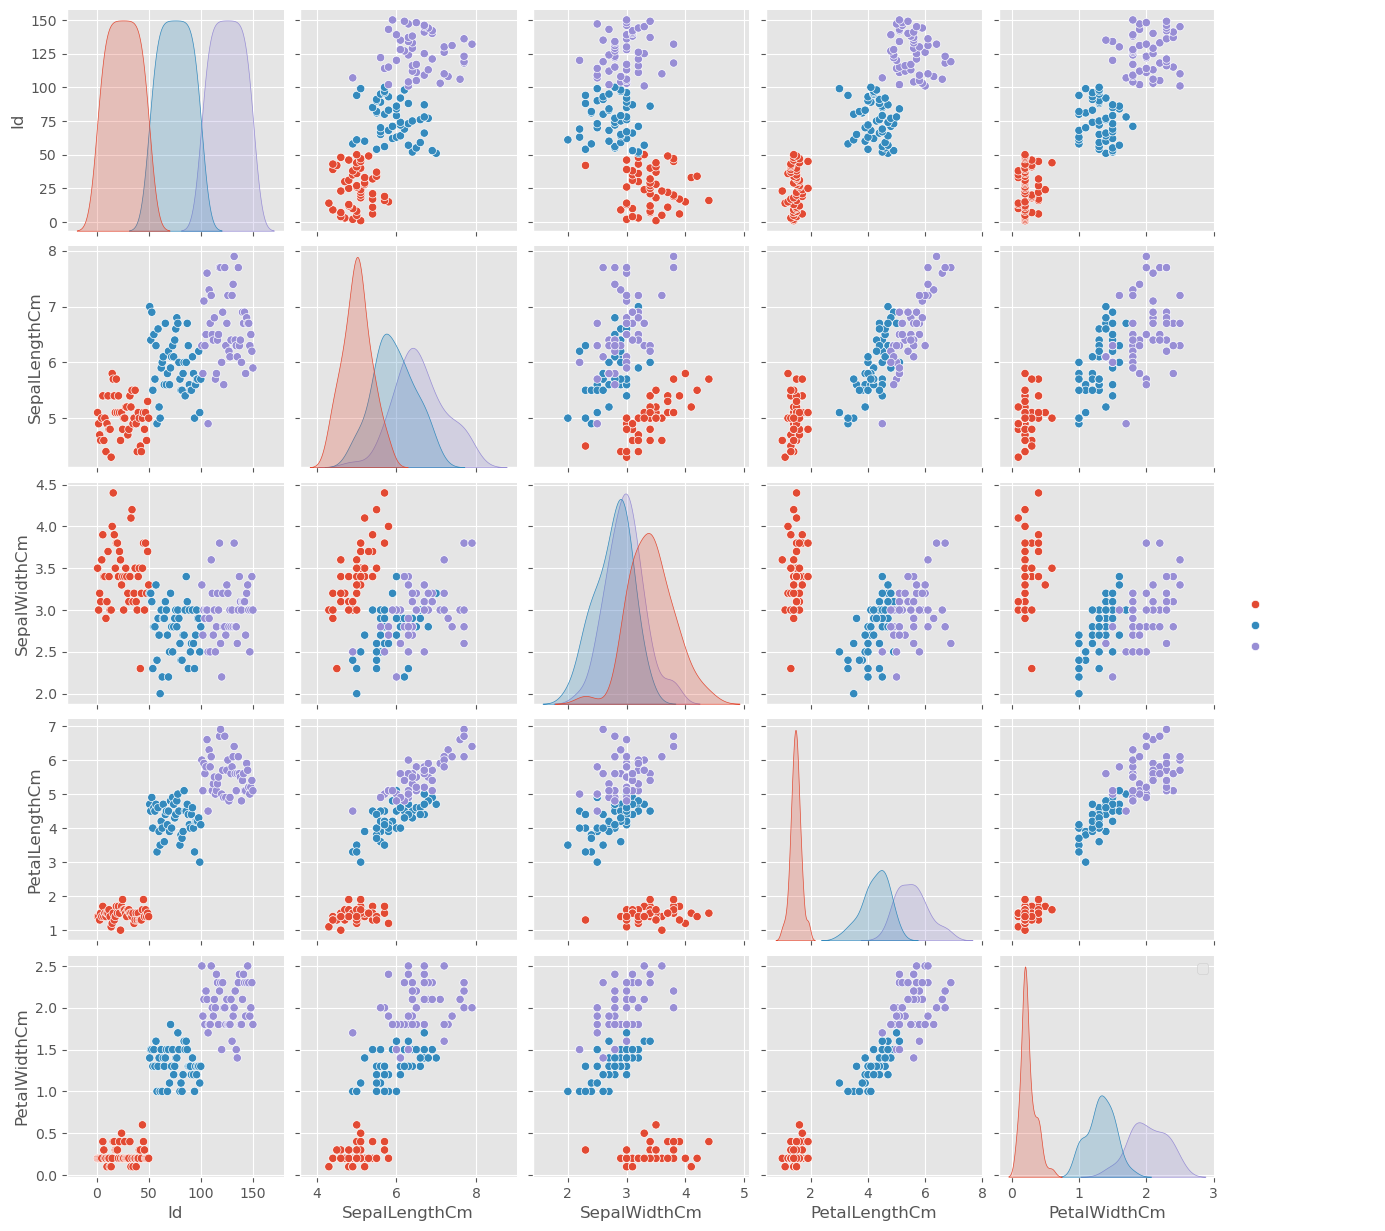

In [70]:
sns.pairplot(iris_data, hue="Species")
plt.legend()
plt.show()

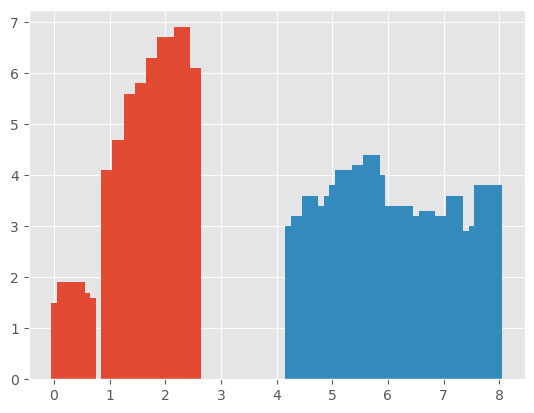

In [86]:
plt.bar(iris_data['PetalWidthCm'], iris_data['PetalLengthCm'], width=0.3)
plt.bar(iris_data['SepalLengthCm'], iris_data['SepalWidthCm'], width=0.3)
plt.show()

In [87]:
# Correlation matrix betwen size of iris and spices
sns.heatmap(iris_data.corr(), annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: 'Iris-setosa'

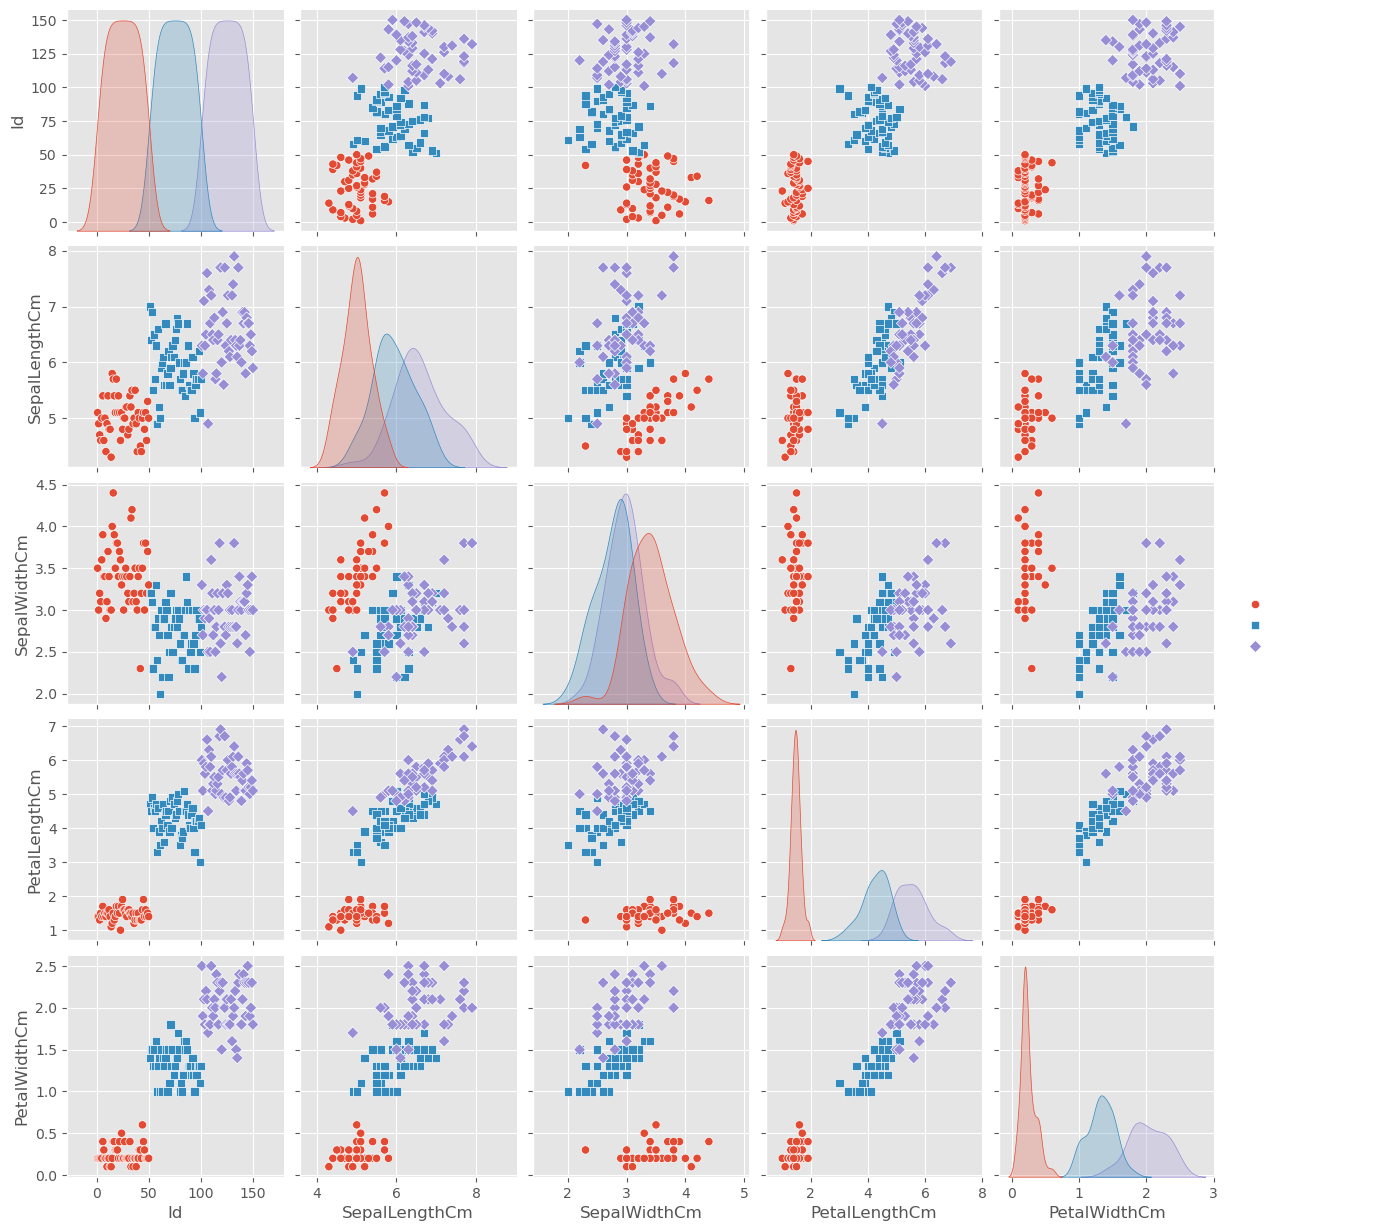

In [65]:
sns.pairplot(iris_data, hue='Species', markers=["o", "s", "D"])
plt.show()

In [66]:
grouped = iris_data.groupby('Species').mean()
print(grouped)


                    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Species                                                              
Iris-setosa       25.5          5.006         3.418          1.464   
Iris-versicolor   75.5          5.936         2.770          4.260   
Iris-virginica   125.5          6.588         2.974          5.552   

                 PetalWidthCm  
Species                        
Iris-setosa             0.244  
Iris-versicolor         1.326  
Iris-virginica          2.026  


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Prepare data
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")


Accuracy: 1.0
